#### Practice Project - 7

# Big Data Mart Sales Problem

#### Problem Statement:
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

The dataset includes two files:

- bigdatamart_Train.csv: Use this file for the model building purpose. 

- bigdatamart_Test.csv: Use this file for getting predictions from the trained model. 

In [12]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

import warnings 
warnings.filterwarnings('ignore')

In [13]:
df_test = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv')
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [14]:
df_train = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv')
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [15]:
# checking shape
print('shape of train : ','\n',df_train.shape,'\n')
print('shape of test :','\n',df_test.shape)

shape of train :  
 (8523, 12) 

shape of test : 
 (5681, 11)


In [16]:
# checking nulls in both the datasets
print('info of train : ','\n',df_train.info(),'\n')
print('info of test :','\n',df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
info of train :  
 None 

<class 'pandas.core

In [17]:
# checking nulls in both the datasets
print('nulls in train dataset: ','\n',df_train.isnull().sum(),'\n')
print('nulls is test dataset:','\n',df_test.isnull().sum())

nulls in train dataset:  
 Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64 

nulls is test dataset: 
 Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64


In [18]:
# filling null values in item weight
df_train['Item_Weight'].fillna(value=df_train['Item_Weight'].mean(),inplace=True)
df_test['Item_Weight'].fillna(value=df_train['Item_Weight'].mean(),inplace=True)

# filling null values in outlet size
df_train['Outlet_Size'].fillna(value='unknown',inplace=True)
df_test['Outlet_Size'].fillna(value='unknown',inplace=True)

* all nulls are removed

In [19]:
# checking duplicates in train
df_train.duplicated().sum()

0

In [20]:
# checking duplicates in test
df_test.duplicated().sum()

0

<AxesSubplot:>

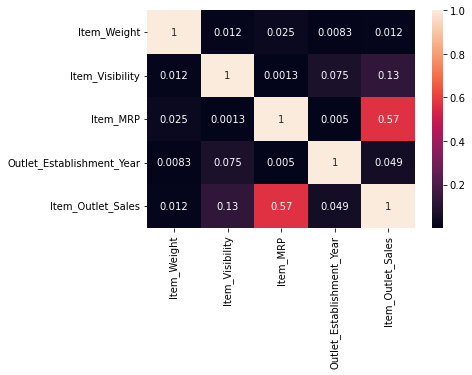

In [21]:
# checking correlation
sns.heatmap(df_train.corr().abs(),annot=True)

<AxesSubplot:>

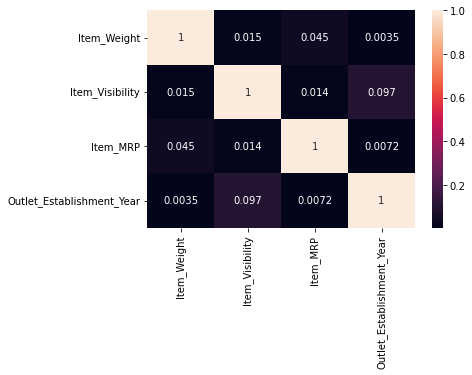

In [22]:
sns.heatmap(df_test.corr().abs(),annot=True)

In [23]:
# making categorical and continues columns
df_train_con = df_train.drop(columns=['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type'],axis=1)
df_train_con.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052


In [24]:
df_train_cat = df_train.drop(columns=['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year','Item_Outlet_Sales'],axis=1)

In [25]:
df_train_cat.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,unknown,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


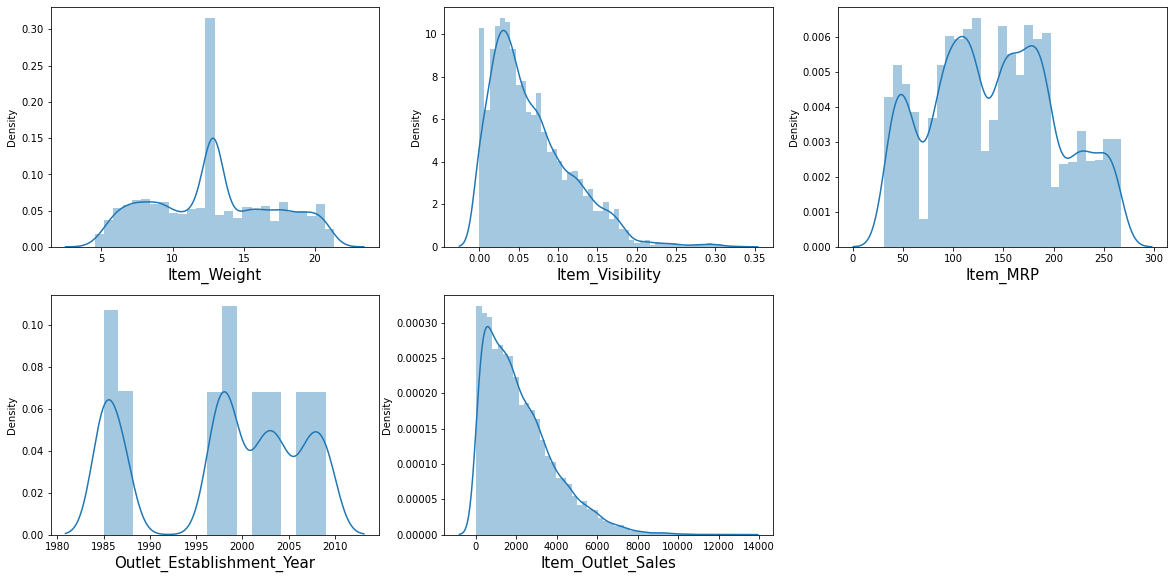

In [26]:
# cheching outliers and correlation and skewness
# let's see data distribution for every row
plt.figure(figsize=(20,15))
plotnumber = 1
for column in df_train_con:
    if plotnumber<=5:
        plt.subplot(3,3,plotnumber)
        sns.distplot(df_train_con[column])
        plt.xlabel(column,fontsize = 15)
    plotnumber+=1
plt.show() 

 * all data looks but item_visibility is skewed

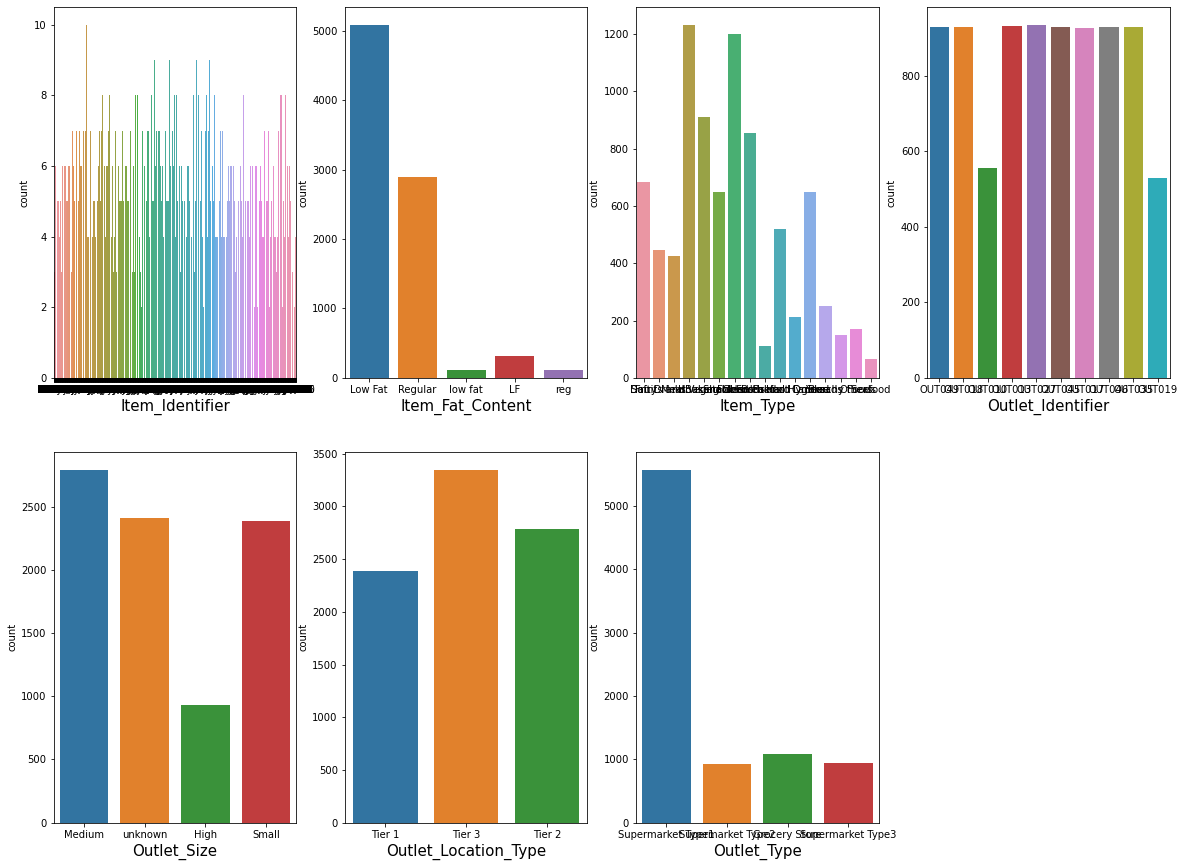

In [27]:
plt.figure(figsize=(20,15))
plotnumber = 1
for column in df_train_cat:
    if plotnumber<=7:
        plt.subplot(2,4,plotnumber)
        sns.countplot(df_train_cat[column])
        plt.xlabel(column,fontsize = 15)
    plotnumber+=1
plt.show()

data distribiution looks good except in Item fat count and outlet type

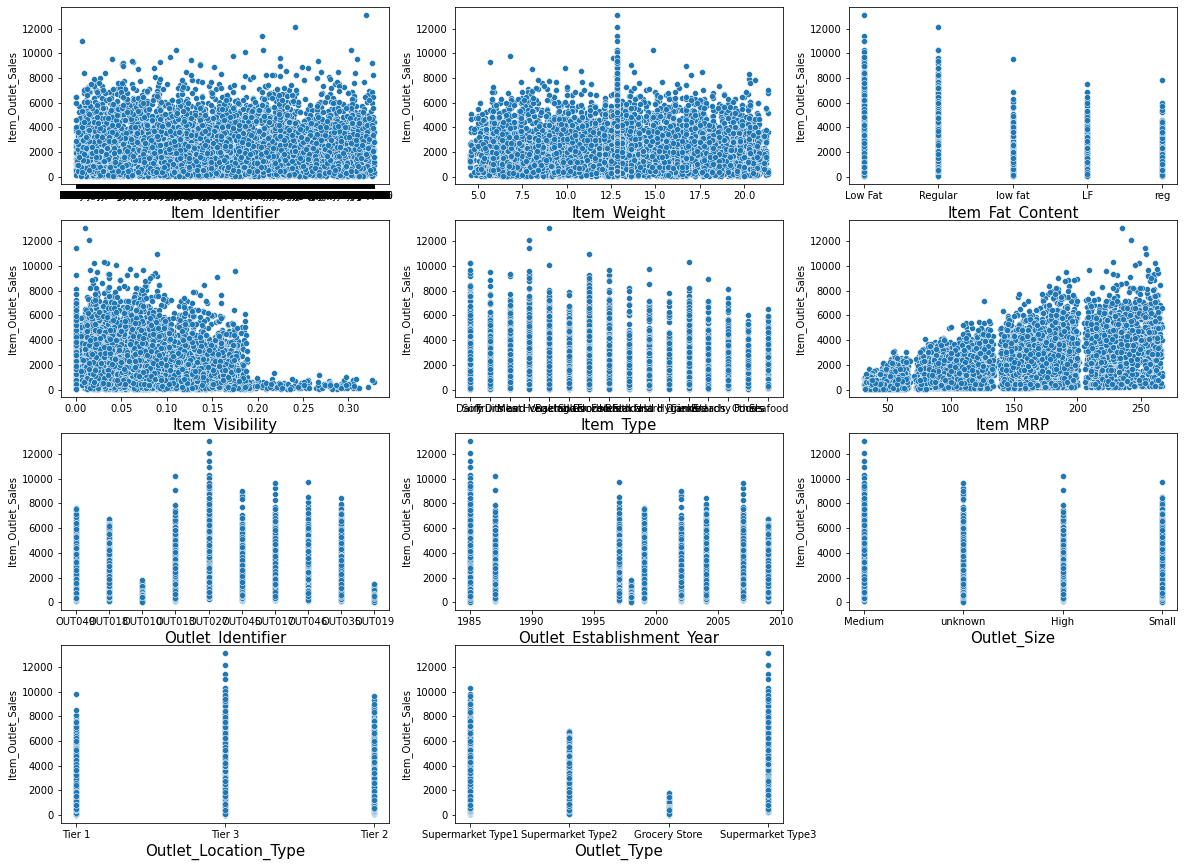

In [28]:
# checking relation with target column
plt.figure(figsize=(20,15))
plotnumber = 1
for column in df_train:
    if plotnumber<=11:
        plt.subplot(4,3,plotnumber)
        sns.scatterplot(x=df_train[column],y=df_train.Item_Outlet_Sales)
        plt.xlabel(column,fontsize = 15)
    plotnumber+=1
plt.show()

i will go with all the columns as i see relation with each column

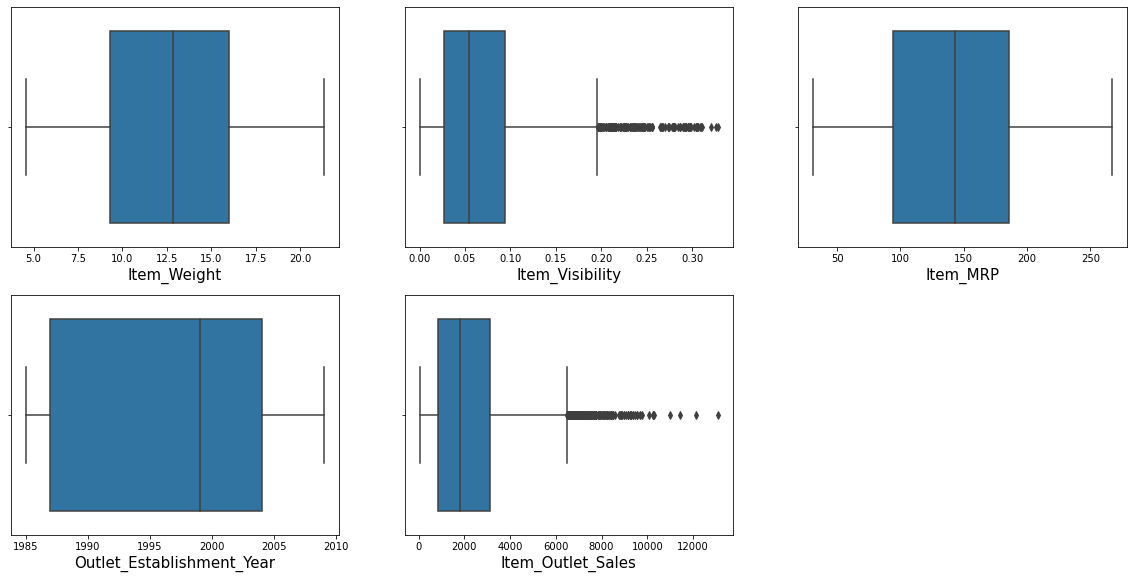

In [29]:
# checking otliers
plt.figure(figsize=(20,15))
plotnumber = 1
for column in df_train_con:
    if plotnumber<=5:
        plt.subplot(3,3,plotnumber)
        sns.boxplot(df_train_con[column])
        plt.xlabel(column,fontsize = 15)
    plotnumber+=1
plt.show() 

* there are outliers in Item_visibility

In [30]:
min_d, max_d = df_train['Item_Visibility'].quantile([0.01, 0.95])
min_d, max_d

(0.0, 0.1637797635999999)

<AxesSubplot:xlabel='Item_Visibility'>

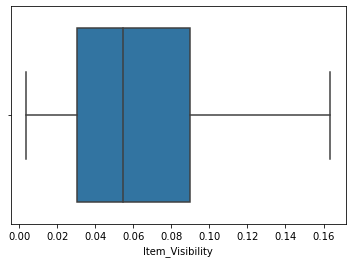

In [31]:
df_train = df_train[(df_train['Item_Visibility']<max_d)&(df_train['Item_Visibility']>min_d)]
# checking outliers
sns.boxplot(x=df_train['Item_Visibility'])

outliers removed

In [32]:
# converting categorical columns into numerical form
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()
df1 = lab_enc.fit_transform(df_train['Item_Identifier'])
pd.DataFrame(df1)
df_train['Item_Identifier'] = df1
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,150,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,8,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,644,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
6,678,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,718,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,357,6.865000,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,871,8.380000,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,unknown,Tier 2,Supermarket Type1,549.2850
8520,1318,10.600000,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,663,7.210000,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [33]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()
df2 = lab_enc.fit_transform(df_train['Item_Fat_Content'])
pd.DataFrame(df2)
df_train['Item_Fat_Content'] = df2
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,150,9.300000,1,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,8,5.920000,2,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,644,17.500000,1,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
6,678,13.650000,2,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,718,12.857645,1,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,357,6.865000,1,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,871,8.380000,2,0.046982,Baking Goods,108.1570,OUT045,2002,unknown,Tier 2,Supermarket Type1,549.2850
8520,1318,10.600000,1,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,663,7.210000,2,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [34]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()
df3 = lab_enc.fit_transform(df_train['Item_Type'])
pd.DataFrame(df3)
df_train['Item_Type'] = df3
df_train.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,150,9.30,1,0.016047,4,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,644,17.50,1,0.016760,10,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


In [35]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()
df4 = lab_enc.fit_transform(df_train['Outlet_Identifier'])
pd.DataFrame(df4)
df_train['Outlet_Identifier'] = df4
df_train.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,150,9.30,1,0.016047,4,249.8092,9,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,644,17.50,1,0.016760,10,141.6180,9,1999,Medium,Tier 1,Supermarket Type1,2097.2700


In [36]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()
df5 = lab_enc.fit_transform(df_train['Outlet_Size'])
pd.DataFrame(df5)
df_train['Outlet_Size'] = df5
df_train.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,150,9.30,1,0.016047,4,249.8092,9,1999,1,Tier 1,Supermarket Type1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,Tier 3,Supermarket Type2,443.4228
2,644,17.50,1,0.016760,10,141.6180,9,1999,1,Tier 1,Supermarket Type1,2097.2700


In [37]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()
df6 = lab_enc.fit_transform(df_train['Outlet_Location_Type'])
pd.DataFrame(df6)
df_train['Outlet_Location_Type'] = df6
df_train.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,150,9.30,1,0.016047,4,249.8092,9,1999,1,0,Supermarket Type1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,Supermarket Type2,443.4228
2,644,17.50,1,0.016760,10,141.6180,9,1999,1,0,Supermarket Type1,2097.2700


In [38]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()
df7 = lab_enc.fit_transform(df_train['Outlet_Type'])
pd.DataFrame(df7)
df_train['Outlet_Type'] = df7
df_train.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,150,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,644,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700


In [39]:
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,150,9.300000,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920000,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,644,17.500000,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
6,678,13.650000,2,0.012741,13,57.6588,1,1987,0,2,1,343.5528
7,718,12.857645,1,0.127470,13,107.7622,5,1985,1,2,3,4022.7636
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,357,6.865000,1,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,871,8.380000,2,0.046982,0,108.1570,7,2002,3,1,1,549.2850
8520,1318,10.600000,1,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,663,7.210000,2,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


In [40]:
# spliting data in target and fearute
x = df_train.drop(columns=['Item_Outlet_Sales'],axis=1)
y = df_train.Item_Outlet_Sales

In [41]:
# scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

#### Model Building

In [42]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25, random_state = 348)

## LinearRegression

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
print('Linear regression model accuracy :',r2_score(y_test,y_pred)*100)

Linear regression model accuracy : 48.05916413066181


In [44]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
y_pred = lr.predict(x_test)
# MAE
print('MAE',mean_squared_error(y_test,y_pred),'\n')
# MSE
print('MSE',mean_absolute_error(y_test,y_pred),'\n')
# RMSE
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

MAE 1482320.372013077 

MSE 915.5444101766507 

RMSE 1217.5057995808795


In [45]:
# regularisation
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
lassocv = LassoCV(alphas=None , max_iter=100 , normalize = True)
lassocv.fit(x_train,y_train)
alpha = lassocv.alpha_
alpha

0.05831503467468261

In [46]:
# now train with alpha
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.05831503467468261)

In [47]:
lasso_reg.score(x_test,y_test)

0.4805966666706214

In [48]:
ridgecv = RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [49]:
ridgecv.alpha_

0.001

In [50]:
ridge_model = Ridge(ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.001)

In [51]:
ridge_model.score(x_test,y_test)

0.4805916478297536

## AdaBoost

In [52]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn import metrics
ada = AdaBoostRegressor()
ada.fit(x_train,y_train)
# model prediction on data
y_pred = ada.predict(x_train)
accuracy = metrics.r2_score(y_train,y_pred)
print('R Square Score : ',accuracy)

R Square Score :  0.47260470103118


In [53]:
# predicting the test data with the result
y_test_pred = ada.predict(x_test)
# predicting the test data with the result
accuracy = metrics.r2_score(y_test,y_test_pred)
y_test_pred = ada.predict(x_test)
print('R Square Score :- ',accuracy)

R Square Score :-  0.4065380473719914


In [54]:
# cross validation if the model is overfitting
from sklearn.model_selection import KFold,cross_val_score
cross_val_score(ada,x,y,cv=10)
cross_val_score(ada,x,y,cv=5).mean()

0.43082685961104306

model is not overfitting

#### Hyperparameter Tuning

In [55]:
from sklearn.model_selection import RandomizedSearchCV
params = {'n_estimators':[20,35,47,50,60,70,80,100], 'learning_rate':[0.25,0.30,0.40]}
rnd_srch = RandomizedSearchCV(AdaBoostRegressor(),cv=5,param_distributions = params)
rnd_srch.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.25, 0.3, 0.4],
                                        'n_estimators': [20, 35, 47, 50, 60, 70,
                                                         80, 100]})

In [56]:
rnd_srch.best_estimator_

AdaBoostRegressor(learning_rate=0.25, n_estimators=20)

In [57]:
ada = AdaBoostRegressor(learning_rate=0.30,n_estimators=15)

ada.fit(x_train,y_train)

y_pred = ada.predict(x_test)
print("****accuracy post tuning****")
print(metrics.r2_score(y_test,y_pred))

****accuracy post tuning****
0.5634269124821809


accuracy inscreased to 56%

## Knn

In [58]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
print('accuracy = ',metrics.r2_score(y_test,y_pred))

accuracy =  0.5103169069747622


In [59]:
# checking overfitting
from sklearn.model_selection import KFold,cross_val_score
cross_val_score(knn,x,y,cv=5)
cross_val_score(knn,x,y,cv=5).mean()

0.2121199521535873

In [60]:
#hyperparameter tining
from sklearn.model_selection import GridSearchCV
param_drid = {'algorithm': ['kd_tree','brute'],
             'leaf_size':[3,4,5,6,7,8],
             'n_neighbors':[3,4,7,9,11,13]
             }
gridsearch = GridSearchCV(estimator=knn, param_grid=param_drid)

In [61]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [3, 4, 5, 6, 7, 8],
                         'n_neighbors': [3, 4, 7, 9, 11, 13]})

In [62]:
gridsearch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 3, 'n_neighbors': 13}

In [63]:
knn = KNeighborsRegressor(algorithm = 'kd_tree', leaf_size = 3, n_neighbors=15)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
print("****accuracy post tuning****")
print(metrics.r2_score(y_test,y_pred))

****accuracy post tuning****
0.5480680673012395


accuracy increased to 45%

## SVM

In [64]:
from sklearn.svm import SVR
svr = SVR()

# model training and score
svr.fit(x_train,y_train)
y_pred = svr.predict(x_test)
print('accuracy : ',metrics.r2_score(y_test,y_pred))

accuracy :  0.05565581007307563


In [65]:
# cross validation
from sklearn.model_selection import KFold,cross_val_score
cross_val_score(svr,x,y,cv=10)
cross_val_score(svr,x,y,cv=10).mean()

-0.04671868575768279

model is not overfitting

In [66]:
# hyperparameter tuning

In [67]:
param_grid = {'C':[1,5,10,20],
              'gamma':[0.001,0.01,0.2,0.002]
             }
gridsearch = GridSearchCV(svr, param_grid)

gridsearch.fit(x_train,y_train)

# best param
gridsearch.best_params_

{'C': 20, 'gamma': 0.01}

In [68]:
svr = SVR(C=100,gamma=0.1)

# model training and score
svr.fit(x_train,y_train)
y_pred = svr.predict(x_test)

print('post tuning accuracy :',metrics.r2_score(y_test,y_pred)*100)

post tuning accuracy : 56.42407726765508


Svr is best model for this dataset

In [69]:
# saving the model
import pickle
filename = "Mart"
pickle.dump(svr,open(filename,'wb'))

In [70]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()

In [71]:
for i in df_test:
    if df_test[i].dtypes=="object":
        df_test[i]=lab.fit_transform(df_test[i].values.reshape(-1,1))

* predicting values

In [72]:
# loading model
import pickle
loaded_model = pickle.load(open('Mart','rb'))
result = loaded_model.predict(df_test)
print(result)

[1536.44411849 1536.44411849 1536.44411849 ... 1536.44411849 1536.44411849
 1536.44411849]
